# New York City Taxi Fare Prediction

## Description
In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques!

Here's an outline for the project:

1. Download the dataset
2. Explore and Analyze the data
3. Prepare the dataset for training ML models
4. Train hardcore and baseline models
5. Make predictions and submit to Kaggle
6. Perform feature engineering
7. Train and evaluate different models
8. Tune hyperparameters for the best model
9. Publish the Project online

In [4]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost
%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Download the dataset

In [6]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [7]:
od.download(dataset_url)

Skipping, found downloaded files in ".\new-york-city-taxi-fare-prediction" (use force=True to force download)


## View Dataset Files

In [9]:
data_dir = 'new-york-city-taxi-fare-prediction'

In [10]:
!dir {data_dir}

 Volume in drive C is OS
 Volume Serial Number is 6EB0-82DC

 Directory of C:\Users\VIVEK\new-york-city-taxi-fare-prediction

2025-01-03  11:57 PM    <DIR>          .
2025-01-04  11:31 PM    <DIR>          ..
2025-01-03  11:57 PM               486 GCP-Coupons-Instructions.rtf
2025-01-03  11:57 PM           343,271 sample_submission.csv
2025-01-03  11:57 PM           983,020 test.csv
2025-01-03  11:57 PM     5,697,178,298 train.csv
               4 File(s)  5,698,505,075 bytes
               2 Dir(s)  274,661,416,960 bytes free


In [11]:
file_path = f"{data_dir}/train.csv"

# Count the number of lines
with open(file_path, 'r', encoding='utf-8') as file:
    line_count = sum(1 for line in file)

print(f"Number of lines in {file_path}: {line_count}")

Number of lines in new-york-city-taxi-fare-prediction/train.csv: 55423857


In [12]:
file_path = f"{data_dir}/test.csv"

# Count the number of lines
with open(file_path, 'r', encoding='utf-8') as file:
    line_count = sum(1 for line in file)

print(f"Number of lines in {file_path}: {line_count}")

Number of lines in new-york-city-taxi-fare-prediction/test.csv: 9915


In [13]:
file_path = f"{data_dir}/sample_submission.csv"

# Count the number of lines
with open(file_path, 'r', encoding='utf-8') as file:
    line_count = sum(1 for line in file)

print(f"Number of lines in {file_path}: {line_count}")

Number of lines in new-york-city-taxi-fare-prediction/sample_submission.csv: 9915


In [14]:
file_path = f"{data_dir}/train.csv"

# Number of lines to display
num_lines = 10

# Display the first `num_lines` lines
with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i >= num_lines:
            break
        print(line.strip())

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [15]:
file_path = f"{data_dir}/test.csv"

# Number of lines to display
num_lines = 10

# Display the first `num_lines` lines
with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i >= num_lines:
            break
        print(line.strip())

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [16]:
file_path = f"{data_dir}/sample_submission.csv"

# Number of lines to display
num_lines = 10

# Display the first `num_lines` lines
with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i >= num_lines:
            break
        print(line.strip())

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


Observations:
- This is a supervized machine learning problem
- Training data is 5.5 GB
- Training data has 5.5 mil rows
- Test set is much smaller (< 10,000)
- The training set has 8 columns
   - Key (a unique identifier)
   - fare_amount (target column)
   - pickup_datetime
   - pickup_longitude
   - pickup_latitude
   - dropoff_longitude
   - dropoff_latitude
   - passenger_count
- The test set has all columns except the target column `fare_amount`
- The submission file should contain the `key` and `fare_amount` for each sample

## Loading Training Set

In [19]:
sample_fraction = 0.01

In [20]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [21]:
dtypes = {
    'fare_amount': 'float32',
    'pickup_datetime': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

In [22]:
import random

In [23]:
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_fraction

In [24]:
random.seed(42)  # Fix the seeds for the random number generator to get the same set of rows everytime.
df = pd.read_csv(data_dir+'/train.csv', 
            usecols=selected_cols,
            parse_dates = ['pickup_datetime'],
            dtype=dtypes, 
            skiprows=skip_row)

## Load test set

In [26]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates = ['pickup_datetime'])

In [27]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [28]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


## Explore the Dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [31]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [32]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

## Test Set

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [35]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [36]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

## Prepare Dataset for Training

 - Split Training and Validation Set
 - Fill/Remove Missing Values
 - Extract Inputs and Outputs
    - Training
    - Validation
    - Test

We will set aside 20% of the training data as the validation set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [41]:
len(train_df), len(val_df)

(441960, 110490)

## Fill/Remove Missing Values

In [43]:
train_df = train_df.dropna()
val_df = val_df.dropna()

## Extract Inputs and Outputs

In [45]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [46]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [47]:
target_col = 'fare_amount'

## Training

In [49]:
train_inputs = train_df[input_cols]

In [50]:
train_targets = train_df[target_col]

In [51]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [52]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [53]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [54]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [55]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

In [56]:
test_inputs = test_df[input_cols]

In [57]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


## Train Hardcoded & Baseline Models

We'll create a model that always predicts the average

In [60]:
class MeanRegressor:
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [61]:
np.full(10, 3)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [62]:
train_inputs.shape[0]

441960

In [63]:
mean_model = MeanRegressor()

In [64]:
mean_model.fit(train_inputs, train_targets)

In [65]:
mean_model.mean

11.354714

In [66]:
train_preds = mean_model.predict(train_inputs)

In [67]:
train_preds   # Will predict the average for all values

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [68]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [69]:
val_preds = mean_model.predict(val_inputs)

In [70]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
def rmse(targets, preds):
    mse = mean_squared_error(targets, preds)
    return mse ** 0.5  # Take the square root of MSE

In [73]:
train_rmse = rmse(train_targets, train_preds)

In [74]:
train_rmse

9.789781840838485

In [75]:
val_rmse = rmse(val_targets, val_preds)

In [76]:
val_rmse

9.89995425435296

## Train & Evaluate Baseline Model

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
linear_model = LinearRegression()

In [80]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [81]:
train_preds = linear_model.predict(train_inputs)

In [82]:
train_preds

array([11.546219, 11.284615, 11.284145, ..., 11.458907, 11.284286,
       11.284452], dtype=float32)

In [83]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [84]:
rmse(train_targets, train_preds)

9.788632662774626

In [85]:
val_preds = linear_model.predict(val_inputs)

In [86]:
rmse(val_targets, val_preds)

9.898087950739093

## Make Predictions

In [88]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [89]:
test_preds = linear_model.predict(test_inputs)

In [90]:
test_preds

array([11.284285 , 11.284639 , 11.2843895, ..., 11.721214 , 11.720765 ,
       11.72056  ], dtype=float32)

In [91]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [92]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [93]:
sub_df['fare_amount'] = test_preds

In [94]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284285
1,2015-01-27 13:08:24.0000003,11.284639
2,2011-10-08 11:53:44.0000002,11.284389
3,2012-12-01 21:12:12.0000002,11.284227
4,2012-12-01 21:12:12.0000003,11.284055
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720243
9910,2015-01-12 17:05:51.0000001,11.720192
9911,2015-04-19 20:44:15.0000001,11.721214
9912,2015-01-31 01:05:19.0000005,11.720765


In [95]:
sub_df.to_csv('linear_model_submission.csv', index=None)


In [96]:
def predict_and_submit(model, test_inputs, fname):  # To easily create submission files
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

## Feature Engineering

- Extract Parts of date - Year, Month, Day, Weekday, Hour
- Remove outliers and invalid data
- Add distance between pickup and drop
- Add distance from landmarks

In [99]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year      # Creates a new column with column name_year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [100]:
add_dateparts(train_df, 'pickup_datetime')

In [101]:
add_dateparts(val_df, 'pickup_datetime')

In [102]:
add_dateparts(test_df, 'pickup_datetime')

In [103]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [104]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16


In [105]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


### Add Distance between Pickup and Drop

We can use the Haversine Distance

In [107]:
def haversine_np(lon1, lat1, lon2, lat2):  # Will calculate the distance between the pickup point and the drop-off point
    """
    Calculate the great-circle distance between two points on the Earth
    specified by their latitude and longitude using the haversine formula.

    Parameters:
    lat1, lon1: Latitude and longitude of the first point in decimal degrees
    lat2, lon2: Latitude and longitude of the second point in decimal degrees

    All args must be of equal length
    
    Returns:
    Distance in kilometers.
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    
    km = 6367 * c  # Radius of Earth in kilometers
    return km


In [108]:
def add_trip_distance(df):
    df['trip_distnace'] = haversine_np(df['pickup_longitude'], 
                                       df['pickup_latitude'], 
                                       df['dropoff_longitude'], 
                                       df['dropoff_latitude'])

In [109]:
add_trip_distance(train_df)

In [110]:
add_trip_distance(val_df)

In [111]:
add_trip_distance(test_df)

In [112]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distnace
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


In [113]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distnace
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9,2.909793
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15,1.433791
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14,20.132486
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19,16.152088
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18,1.799553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20,1.764959
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0,2.751241
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8,0.000000
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16,9.176848


In [114]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distnace
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location

In [117]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [118]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [119]:
def add_landmark(a_df):
    landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
    for name, lonlat in landmarks:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [120]:
add_landmark(train_df)

In [121]:
add_landmark(val_df)

In [122]:
add_landmark(test_df)

In [123]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distnace,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


### Remove Outliers and Invalid Data

In [125]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distnace,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937862,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751762,193.148026,182.365189,191.412308,177.416016,178.902069
std,9.788187,11.826187,8.449581,12.422503,9.833958,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,370.978485,1222.565186,1225.509888,1227.219604,1227.147827,1227.168091
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305583,0.116402,0.129245,0.031195,0.009281
25%,6.000000,-73.992027,40.734859,-73.991409,40.733967,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212447,20.535247,8.350981,16.502820,2.169769,3.642480
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116254,21.202131,9.575539,18.016346,3.817937,5.559632
75%,12.500000,-73.967186,40.767006,-73.963715,40.768044,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879624,21.948318,11.122054,19.953297,6.071617,7.814558
max,400.000000,2420.209473,404.899994,2467.752686,3351.403076,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.427734,15057.673828,15074.642578,15074.713867,15077.615234,15072.110352


In [126]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distnace,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652
std,0.042799,0.033542,0.039093,0.035436,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969877,3.303940,3.295646,4.035816,4.018422,4.252535
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492


We'll use the following ranges:

- fare_amount: $1 to $500
- longitude: -75 to -72
- latitude: 40 to 42
- passenger_ xount: 1 to 6

These ranges are based on the test_df

In [128]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >= 40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [129]:
train_df = remove_outliers(train_df)

In [130]:
val_df = remove_outliers(val_df)

### Save Intermediate DataFrames

In [132]:
train_df.to_parquet('train_parquet')

In [133]:
val_df.to_parquet('val_parquet')

## Train and Evaluate Different Models

We'll train each of the following models:
 - Ridge Regression
 - Random Forests
 - Gradient Boosting

### Split Inputs and Targets

In [137]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distnace',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [302]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distnace',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [304]:
target_col = 'fare_amount'

In [306]:
train_inputs = train_df[input_cols]

In [308]:
train_targets = train_df[target_col]

In [310]:
val_inputs = val_df[input_cols]

In [312]:
val_targets = val_df[target_col]

In [314]:
test_inputs = test_df[input_cols]

In [316]:
def rmse(targets, preds):
    mse = mean_squared_error(targets, preds)
    return mse ** 0.5  # Take the square root of MSE

In [340]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = rmse(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = rmse(val_targets, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

### Ridge Regression

In [343]:
from sklearn.linear_model import Ridge

In [345]:
model1 = Ridge(random_state=42)

In [347]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [349]:
evaluate(model1)

(5.049315152711236,
 5.217865657340093,
 array([ 8.12925918,  4.11578439,  8.75063014, ..., 10.47234932,
         8.2305928 , 10.58672774]),
 array([10.91955339,  6.20493172, 46.21787888, ...,  8.0463052 ,
        25.56885585,  8.45342102]))

Our model got a validation RMSE of $5.21

In [355]:
train_inputs.shape

(431098, 16)

In [357]:
predict_and_submit(model1, test_inputs, 'ridge_submission')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.082151
1,2015-01-27 13:08:24.0000003,11.399499
2,2011-10-08 11:53:44.0000002,5.356923
3,2012-12-01 21:12:12.0000002,8.763571
4,2012-12-01 21:12:12.0000003,14.609918
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024995
9910,2015-01-12 17:05:51.0000001,11.218598
9911,2015-04-19 20:44:15.0000001,47.926481
9912,2015-01-31 01:05:19.0000005,22.600022


### Random Forest

In [359]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
model2 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=10, n_estimators = 100)

In [157]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: total: 12min 53s
Wall time: 1min 9s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [361]:
evaluate(model2)

(3.594772746739602,
 4.160784519860214,
 array([ 6.99399909,  9.09865173,  9.09379987, ..., 10.43082088,
         7.7821555 , 10.400694  ]),
 array([12.65433613,  6.14604627, 47.31069124, ...,  8.36589355,
        29.27069612,  8.24300598]))

Our model got a validation RMSE of $4.16

In [371]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.479748
1,2015-01-27 13:08:24.0000003,10.468653
2,2011-10-08 11:53:44.0000002,5.046148
3,2012-12-01 21:12:12.0000002,8.481902
4,2012-12-01 21:12:12.0000003,14.300374
...,...,...
9909,2015-05-10 12:37:51.0000002,8.694722
9910,2015-01-12 17:05:51.0000001,12.535128
9911,2015-04-19 20:44:15.0000001,55.355344
9912,2015-01-31 01:05:19.0000005,21.467722


### Gradient Boosting

In [415]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [416]:
pip install --upgrade xgboost

In [417]:
from xgboost import XGBRegressor

In [433]:
model3 = XGBRegressor(
    max_depth=5,
    objective='reg:squarederror',
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [435]:
model3.fit(train_inputs, train_targets)

C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [436]:
evaluate(model3)

(3.1945446182982544,
 4.027132992636432,
 array([ 6.5086284,  8.475021 , 10.250745 , ..., 11.6175   ,  9.493622 ,
        10.145834 ], dtype=float32),
 array([14.869394 ,  5.5537467, 48.604473 , ...,  7.853152 , 31.240097 ,
         8.467824 ], dtype=float32))

In [439]:
predict_and_submit(model3, test_inputs, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.296623
1,2015-01-27 13:08:24.0000003,11.594138
2,2011-10-08 11:53:44.0000002,4.860382
3,2012-12-01 21:12:12.0000002,8.774776
4,2012-12-01 21:12:12.0000003,15.982100
...,...,...
9909,2015-05-10 12:37:51.0000002,9.169091
9910,2015-01-12 17:05:51.0000001,11.624935
9911,2015-04-19 20:44:15.0000001,53.426765
9912,2015-01-31 01:05:19.0000005,19.824623


## Tune Hyperparameters

We'll tune the hyperparameters for the XGboost model.

In [460]:
def test_params(ModelClass, **params):
    """ Trains a model with the given parameters and returns training and validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = rmse(model.predict(train_inputs), train_targets)
    val_rmse = rmse(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

def test_params_and_plot(ModelClass, param_name, param_values, **other_params):
    """ Trains multiple multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    

In [470]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'learning_rate': 0.05
}

### No. of Trees

C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: total: 55.1 s
Wall time: 6.9 s


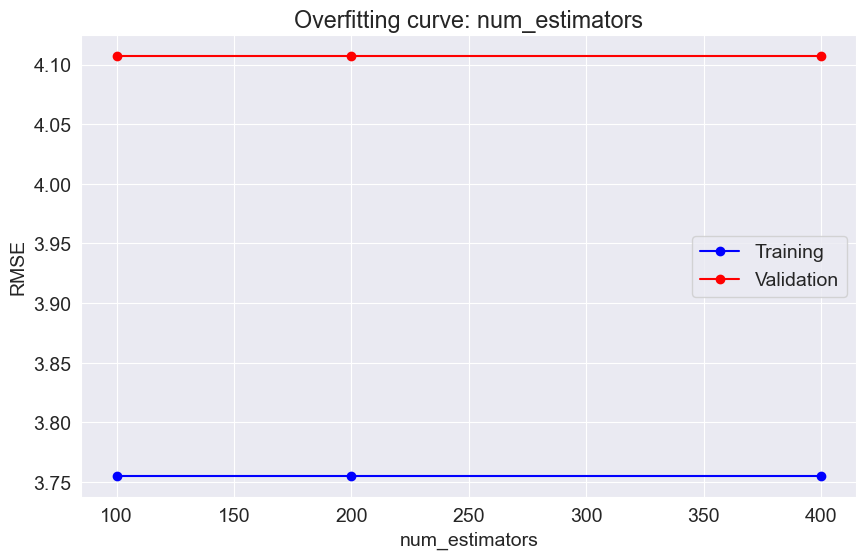

In [473]:
%%time
test_params_and_plot(XGBRegressor, 'num_estimators', [100, 200, 400], **best_params)

In [480]:
best_params['num_estimators'] = 100

### Max Depth

C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


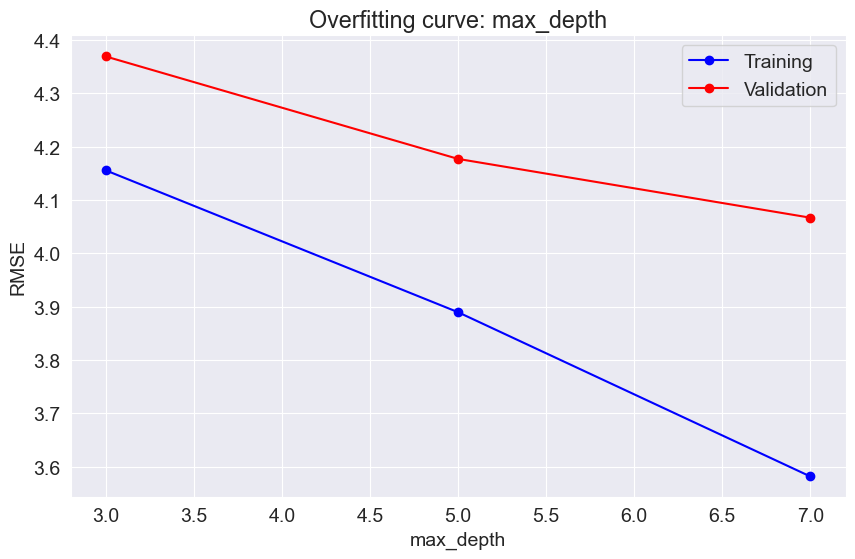

In [482]:
test_params_and_plot(XGBRegressor, 'max_depth', [3, 5, 7], **best_params)

In [484]:
best_params['max_depth'] = 7  # Best is 7

### Learning Rate

C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\VIVEK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


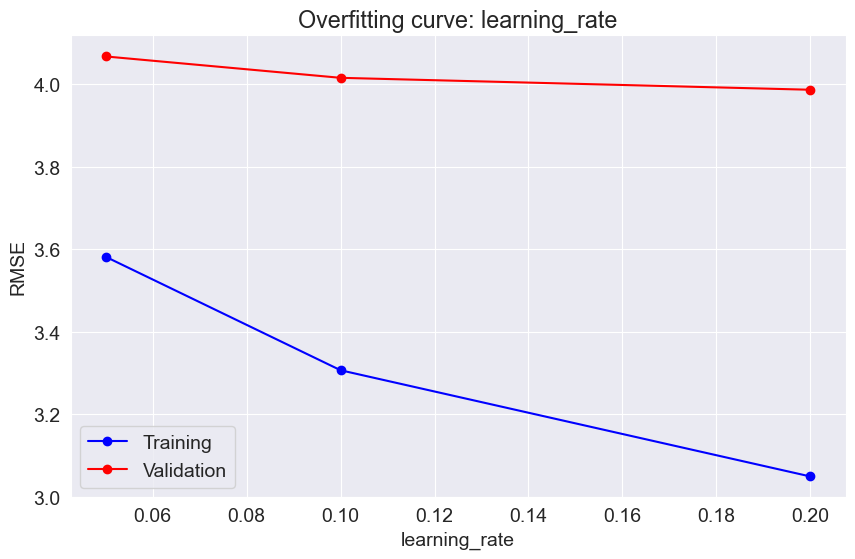

In [487]:
test_params_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1,0.2], **best_params)

In [489]:
best_params['learning_rate'] = 0.20  # Best is 0.20

Here's a set of parameters that works well:

In [494]:
xgb_model_final = XGBRegressor(objective='reg:squarederror',
                               n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_depth=8,
                               learning_rate=0.08,
                               subsample=0.8,
                               colsample_bytree=0.7)  # We'll use 80% of the columns

In [496]:
xgb_model_final.fit(train_inputs, train_targets)

C:\Users\VIVEK\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [497]:
evaluate(xgb_model_final)

(2.4577479446770387,
 3.951603411926162,
 array([ 6.8105044,  6.35679  ,  9.738837 , ..., 12.199177 ,  9.514413 ,
         9.7615   ], dtype=float32),
 array([15.066565 ,  5.635199 , 48.561275 , ...,  7.9904366, 31.344067 ,
         8.606645 ], dtype=float32))

In [504]:
predict_and_submit(xgb_model_final, test_inputs, 'xgb_tuned_submissions.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.810386
1,2015-01-27 13:08:24.0000003,11.044217
2,2011-10-08 11:53:44.0000002,4.629151
3,2012-12-01 21:12:12.0000002,9.136875
4,2012-12-01 21:12:12.0000003,16.603849
...,...,...
9909,2015-05-10 12:37:51.0000002,9.060974
9910,2015-01-12 17:05:51.0000001,11.433013
9911,2015-04-19 20:44:15.0000001,53.250923
9912,2015-01-31 01:05:19.0000005,18.291016


This gets us a score of 3.28235, which is amongst the top 30%